In [2]:
import numpy as np

X = np.load('../datasets/topicos_cc/X.npy')
X_selected_features = np.load('../datasets/topicos_cc/X_selected_features.npy')
y = np.load('../datasets/topicos_cc/y.npy')

X.shape, y.shape

((792, 40), (792,))

In [2]:
import matplotlib.pyplot as plt

def plot_history(h):
    loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Custo não está presente no histórico')
        return
    epochs = range(1, len(h.history[loss_list[0]]) + 1)
    # Custo
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Custo [treinamento] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Custo [validação] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    plt.title('Custo')
    plt.xlabel('Épocas')
    plt.ylabel('Custo')
    plt.legend()
    # Acurácia
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Acurácia [treinamento] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    for l in val_acc_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Acurácia [validação] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    plt.title('Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.show()

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
y_categorical = to_categorical(y, num_classes=10)
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y_categorical, test_size=0.3, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((554, 8), (238, 8), (554, 10), (238, 10))

In [17]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
18/18 [==============================] - 0s 6ms/step - loss: 0.5219 - accuracy: 0.8069 - val_loss: 0.8193 - val_accuracy: 0.6891
Epoch 2/10
18/18 [==============================] - 0s 4ms/step - loss: 0.5204 - accuracy: 0.7996 - val_loss: 0.8117 - val_accuracy: 0.7017
Epoch 3/10
18/18 [==============================] - 0s 4ms/step - loss: 0.5151 - accuracy: 0.8051 - val_loss: 0.8148 - val_accuracy: 0.7017
Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 0.5152 - accuracy: 0.8069 - val_loss: 0.8112 - val_accuracy: 0.7059
Epoch 5/10
18/18 [==============================] - 0s 4ms/step - loss: 0.5071 - accuracy: 0.8069 - val_loss: 0.8144 - val_accuracy: 0.6933
Epoch 6/10
18/18 [==============================] - 0s 5ms/step - loss: 0.5071 - accuracy: 0.8123 - val_loss: 0.8169 - val_accuracy: 0.7017
Epoch 7/10
18/18 [==============================] - 0s 4ms/step - loss: 0.5024 - accuracy: 0.8105 - val_loss: 0.8117 - val_accuracy: 0.7059
Epoch 8/10
18/18 [==

8/8 [==============================] - 0s 2ms/step - loss: 0.8063 - accuracy: 0.7017
Loss: 0.8063267469406128
Accuracy: 0.7016806602478027


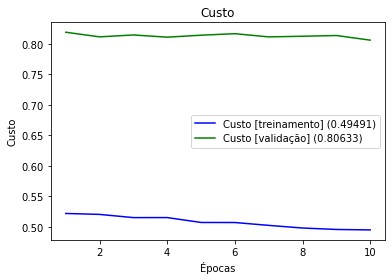

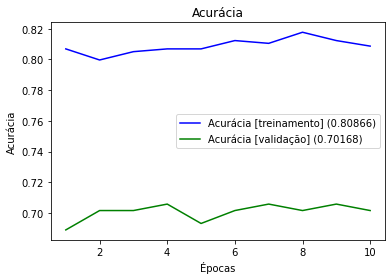

In [28]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)
plot_history(history)